In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout, Activation
from keras import regularizers, initializers
import matplotlib.pyplot as plt 

In [80]:
# Loading data
data=pd.read_csv('data_hw2.csv')
xdata=data.iloc[:,0:-1]
xnorm=((xdata-xdata.min(axis=0))/(xdata.max(axis=0)-xdata.min(axis=0)))
ydata=data['Y']
x0=pd.DataFrame(np.ones((700, 1)))
xnorm.insert(0,'A0',1)
x=xnorm.replace(np.nan,0)
encoder = LabelEncoder()
encod=encoder.fit_transform(ydata)
y = np_utils.to_categorical(encod)
# Splitting Data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=2000,test_size=300,shuffle=False)

In [81]:
print('Single hidden layer')
hiddenlsize=[5,25]
accuracylist=[]
a=[]
input_size = 20
for j in range(len(hiddenlsize)):
    print('Size of Input layer:',input_size)
    print('Size of Hidden layer',hiddenlsize[j])
    for i in range (1,10):
        regularizer= regularizers.l2(l=0.1)
        initial= initializers.glorot_uniform(seed=None)
        model=Sequential() 
        # creating the model
        model.add(Dense(hiddenlsize[j], activation='relu', kernel_regularizer=regularizer, input_shape=(20,), kernel_initializer=initial)) #1st hidden layer with 20 inputs
        model.add(Dense(7, activation='softmax'))
        custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
        # Compiling the model
        model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(x_train, y_train, epochs=100, batch_size=100, verbose=0 )
        loss, accuracy = model.evaluate(x_test,y_test, batch_size=None)
        accuracylist.append(accuracy)
    Accuracy=np.mean(accuracylist)
    a.append(Accuracy)
    print('Average Test_accuracy: ',Accuracy,'when the size of hidden layer is:',hiddenlsize[j])

Single hidden layer
Size of Input layer: 20
Size of Hidden layer 5
10/10 [==============================] - 0s 2ms/step - loss: 0.7358 - accuracy: 0.7833
Average Test_accuracy:  0.8340740733676486 when the size of hidden layer is: 5
Size of Input layer: 20
Size of Hidden layer 25
10/10 [==============================] - 0s 2ms/step - loss: 0.5507 - accuracy: 0.8767
Average Test_accuracy:  0.840370366970698 when the size of hidden layer is: 25


In [82]:
print('Two hidden layer')
hiddenlsize=[5,25]
accuracylist1=[]
a1=[]
inputsize = 20
for j in range(len(hiddenlsize)):
    print('Size of Input layer:',inputsize)
    print('Size of Hidden layer',hiddenlsize[j])
    for i in range (1,10):
        r= regularizers.l2(l=0.1)
        initial= initializers.glorot_uniform(seed=None)
        model=Sequential() 
        model.add(Dense(hiddenlsize[j], activation='relu', kernel_regularizer=r, input_shape=(20,), kernel_initializer=initial)) #1st hidden layer with 20 inputs
        model.add(Dense(hiddenlsize[j], activation='relu', kernel_regularizer=r)) 
        model.add(Dense(7, activation='softmax'))
        optimize = tf.keras.optimizers.Adam(learning_rate=0.1)
        model.compile(optimizer=optimize, loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(x_train, y_train, epochs=100, batch_size=100, verbose=0 )
        loss1, accuracy1 = model.evaluate(x_test,y_test, batch_size=None)
        accuracylist1.append(accuracy1)
    Accuracy1=np.mean(accuracylist1)
    a1.append(Accuracy1)
    print('Average Test_accuracy: ',Accuracy1,'when the size of hidden layer is:',hiddenlsize[j])

Two hidden layer
Size of Input layer: 20
Size of Hidden layer 5
10/10 [==============================] - 0s 2ms/step - loss: 0.9338 - accuracy: 0.6000
Average Test_accuracy:  0.5229629609319899 when the size of hidden layer is: 5
Size of Input layer: 20
Size of Hidden layer 25
10/10 [==============================] - 0s 2ms/step - loss: 1.0336 - accuracy: 0.6167
Average Test_accuracy:  0.5799999932448069 when the size of hidden layer is: 25


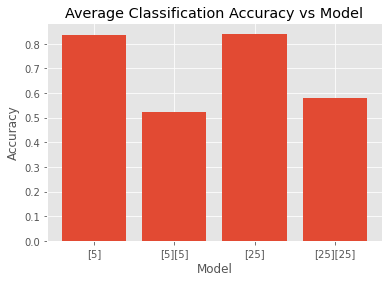

In [84]:
# Plotting Graphs
Accuracypl=[a[0],a1[0],a[1],a1[1]]
model = ['[5]', '[5][5]', '[25]', '[25][25]' ]
plt.bar(model, Accuracypl)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Average Classification Accuracy vs Model")
plt.show()